<a href="https://colab.research.google.com/github/emincingoz/Machine_Learning_Collection/blob/tensorflow_keras/MNIST_with_tensorflow_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [2]:
import tensorflow as tf

tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6658756837445382292
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14765102566887970250
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [4]:
!cat /proc/meminfo

MemTotal:       13302920 kB
MemFree:         6386940 kB
MemAvailable:   11749656 kB
Buffers:          120920 kB
Cached:          5179072 kB
SwapCached:            0 kB
Active:          2934032 kB
Inactive:        3580896 kB
Active(anon):     969976 kB
Inactive(anon):    10700 kB
Active(file):    1964056 kB
Inactive(file):  3570196 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              2124 kB
Writeback:             0 kB
AnonPages:       1215108 kB
Mapped:           781940 kB
Shmem:             11452 kB
KReclaimable:     139880 kB
Slab:             197700 kB
SReclaimable:     139880 kB
SUnreclaim:        57820 kB
KernelStack:        6320 kB
PageTables:        13312 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    4542880 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       52588 kB
VmallocChunk:          0 kB
Percpu:          

In [5]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [6]:
from tensorflow.keras.datasets import mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28)
y_train shape:  (60000,)
y_test shape:  (10000,)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

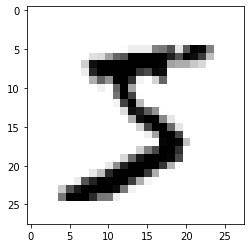

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mlp

print(x_train[0])
plt.imshow(x_train[0], cmap = mlp.cm.binary)

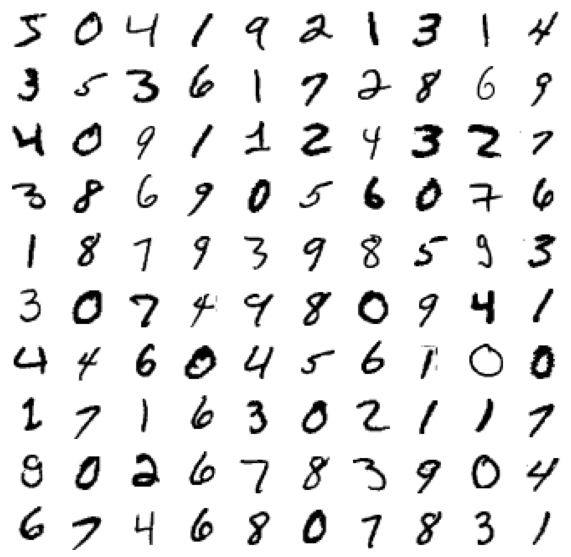

In [10]:
plt.figure(figsize = (10, 10))
for i in range(100):
  plt.subplot(10, 10, (i + 1))
  plt.imshow(x_train[i], cmap = mlp.cm.binary)
  plt.axis('off')

In [11]:
x_train[0].shape

(28, 28)

In [12]:
# Scaling images to the [0, 1] ranges
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [13]:
x_train[0].shape

(28, 28)

In [14]:
import numpy as np

# (28, 28, 1): 28x28 is height and width, 1 in last part is to specify the color depth of the pixel. 1 is for grayscale image(black and white)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train[0].shape

(28, 28, 1)

In [15]:
y_train[0]

5

In [16]:
from tensorflow import keras

num_classes = 10


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [17]:
print(y_train[0])
print(y_train[1])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
from keras import layers
from keras import Sequential

input_shape = (28, 28, 1)

model = Sequential(
    [
     keras.Input(shape = input_shape),
     layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu'),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(num_classes, activation = 'softmax'),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [19]:
batch_size = 128
epochs = 15

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

model.fit(x_train, 
          y_train, 
          batch_size = batch_size, 
          epochs = epochs, 
          validation_split = 0.1)

Epoch 1/15
422/422 [==============================] - 8s 9ms/step - loss: 0.3777 - accuracy: 0.8845 - val_loss: 0.0826 - val_accuracy: 0.9780
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1128 - accuracy: 0.9663 - val_loss: 0.0589 - val_accuracy: 0.9840
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0874 - accuracy: 0.9731 - val_loss: 0.0498 - val_accuracy: 0.9865
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0703 - accuracy: 0.9776 - val_loss: 0.0416 - val_accuracy: 0.9888
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0642 - accuracy: 0.9804 - val_loss: 0.0381 - val_accuracy: 0.9895
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0573 - accuracy: 0.9819 - val_loss: 0.0379 - val_accuracy: 0.9892
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0520 - accuracy: 0.9840 - val_loss: 0.0355 - val_accuracy: 0.9897
Epoch 

In [20]:
model.save('MyDrive/models/mnist_digit_recognition_epochs_15.h5')

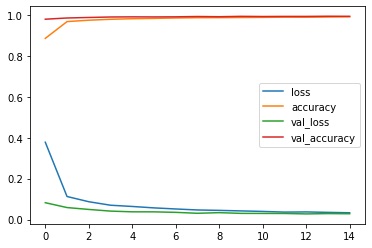

In [21]:
import pandas as pd

loss = model.history.history
loss = pd.DataFrame(loss)
loss.plot()

In [22]:
score = model.evaluate(x_test, y_test, verbose = 1)

print('Test Loss: ', score[0])
print('Test Accuracy: ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9920
Test Loss:  0.023252204060554504
Test Accuracy:  0.9919999837875366


Text(87.0, 0.5, 'True Values')

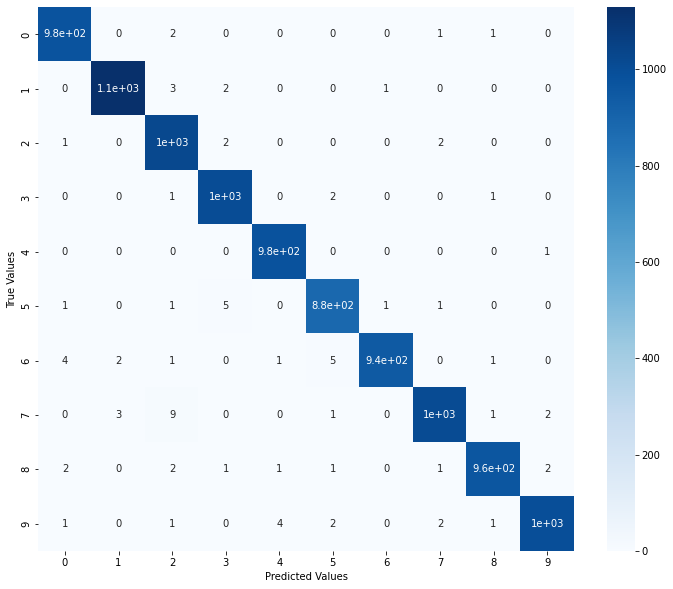

In [24]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize = (12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap = 'Blues', annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

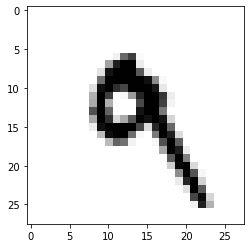

Prediction:  9


In [25]:
plt.imshow(x_test[7].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

prediction = model.predict(x_test[7].reshape(1, 28, 28, 1)).argmax()
print('Prediction: ', prediction)

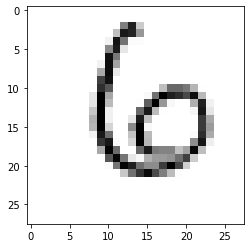

Prediction:  6


In [26]:
plt.imshow(x_test[100].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

prediction = model.predict(x_test[100].reshape(1, 28, 28, 1)).argmax()
print('Prediction: ', prediction)

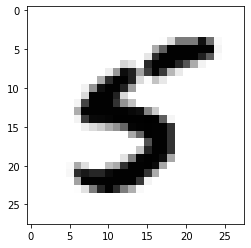

Prediction:  5


In [27]:
plt.imshow(x_test[155].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

prediction = model.predict(x_test[155].reshape(1, 28, 28, 1)).argmax()
print('Prediction: ', prediction)